# PLS regression analysis for MEND DTI and clinical data

- Project:        HCP-EP
- File Name:      PLS_regression_MEND
- Author:         Haley Wang
- Date Created:   2023-07-06
- Last Modified:  2023-07-06
- Code Status:    Finished

In [1]:
import numpy as np
import pandas as pd
import pyls
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from netneurotools import datasets, stats, plotting
from scipy.stats import zscore, pearsonr, ttest_ind
from scipy.spatial.distance import squareform, pdist

In [2]:
from IPython.display import display, Javascript

def beep():
    display(Javascript('new Audio("https://www.soundjay.com/buttons/sounds/button-09a.mp3").play()'))

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.reset_option('all')

In [4]:
"""
load data (age and sex were regressed out)
"""

df = pd.read_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/PLS_MEND_Replication/MEND_PLS_all.csv')


In [6]:
"""
Create X and Y for PLS
"""
predictor_cleaned =  df.filter(regex='^(FA|MD|AD|RD)')
response_cleaned = df.filter(regex='^(BPRS|SANS|YMRS)')

In [10]:
BPRS = df.filter(regex='^(SANS)')
len(BPRS.columns)

20

In [7]:
"""
behavioral PLS
"""
X = zscore(predictor_cleaned)
Y = zscore(response_cleaned)

In [8]:
len(Y.columns)

49

In [8]:
pls_result = pyls.behavioral_pls(X, Y, n_boot=5000, n_perm=10000, n_split=0, 
                                 test_split=0, covariance=False, rotate=True, 
                                 flip_sign=False, ci=95, verbose=True, n_proc='max')

Running permutations:   0%|1                            | 36/10000 | 00:00<01:26/u/home/h/haleywan/.conda/envs/analysis/lib/python3.10/site-packages/sklearn/utils/extmath.py:369: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(
/u/home/h/haleywan/.conda/envs/analysis/lib/python3.10/site-packages/sklearn/utils/extmath.py:369: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to

In [17]:
pyls.save_results('MEND_pls_result.hdf5', pls_result)

'MEND_pls_result.hdf5'

In [9]:
pls_result.permres.pvals

array([0.00989901, 0.27947205, 0.19958004, 0.56684332, 0.46845315,
       0.42385761, 0.57494251, 0.88081192, 0.66683332, 0.99060094,
       0.9260074 , 0.76482352, 0.90570943, 0.9750025 , 0.95140486,
       0.99950005, 0.96920308, 0.99270073, 0.99940006, 0.9880012 ,
       1.        , 0.99990001, 1.        , 0.99970003, 0.99990001,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [10]:
pls_result.varexp

array([3.78233118e-01, 1.40646543e-01, 9.93353455e-02, 5.87669148e-02,
       4.49640040e-02, 4.04732036e-02, 2.75801028e-02, 2.55214620e-02,
       2.28808230e-02, 1.84883583e-02, 1.70380532e-02, 1.59762553e-02,
       1.30284417e-02, 1.12546632e-02, 1.00829884e-02, 9.39093090e-03,
       7.71201579e-03, 7.23887965e-03, 6.98096145e-03, 5.90312972e-03,
       5.28420891e-03, 4.72275052e-03, 4.26147386e-03, 3.50309650e-03,
       3.02571771e-03, 2.48843830e-03, 2.36543762e-03, 1.84901992e-03,
       1.54565937e-03, 1.48509522e-03, 1.28232085e-03, 1.02804154e-03,
       9.38262747e-04, 7.73004293e-04, 7.45697854e-04, 6.85683140e-04,
       4.78011159e-04, 3.92708504e-04, 3.57102258e-04, 3.04967267e-04,
       2.47146430e-04, 2.09801611e-04, 1.75763146e-04, 1.28271353e-04,
       7.58943506e-05, 6.37464021e-05, 3.46930764e-05, 3.03662030e-05,
       2.14251007e-05])

In [11]:
"""
loadings - neural
"""
xload = pyls.behavioral_pls(Y, X, n_boot=5000, n_perm=0, test_split=0)

In [18]:
pyls.save_results('MEND_pls_loadings.hdf5', xload)

'MEND_pls_loadings.hdf5'

In [12]:
lv = 0 # latent variable
beep()

<IPython.core.display.Javascript object>

In [14]:
# Assessing contribution of variables within a dimension
effect_size = pow(xload["y_loadings"][:, lv],2)
std_effect_size = zscore(effect_size)
relidx = abs(std_effect_size) > 2

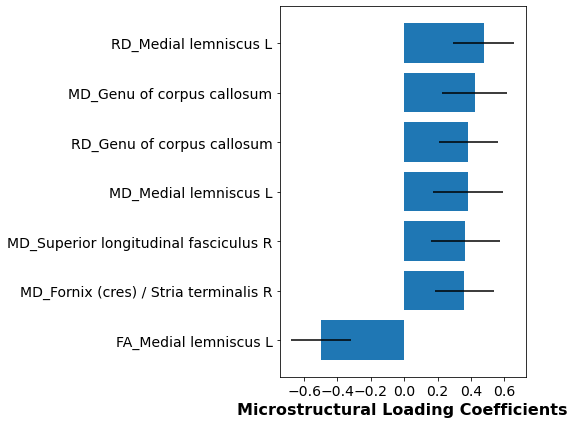

In [15]:
err = (xload["bootres"]["y_loadings_ci"][:, lv, 1]
      - xload["bootres"]["y_loadings_ci"][:, lv, 0]) / 2
#relidx = (abs(xload["y_loadings"][:, lv]) - err) > 0.10 # CI doesnt cross 0 , LV 0 - 0.265; LV1 - 0.1395, LV2 - 0.1365
sorted_idx = np.argsort(-1 * xload["y_loadings"][relidx, lv])

# Extract column names as a list
diffusion_idx = predictor_cleaned.columns.tolist()

#plot the figure
plt.figure(figsize=(7.5,6))
plt.ion()

#plt.bar(np.sort(xload["y_loadings"][relidx, lv]), np.arange(sum(relidx)), yerr=err[relidx][sorted_idx])
plt.barh(np.arange(sum(relidx)), np.sort(-1 * xload["y_loadings"][relidx, lv]), xerr=err[relidx][sorted_idx], align='center')
#plt.barh(np.arange(0,10), loadings, xerr=err[relidx][sorted_idx], align='center')
plt.yticks(np.arange(sum(relidx)), labels=predictor_cleaned.columns[relidx][sorted_idx],
           rotation='horizontal', fontsize=14)
plt.xticks(fontsize=14)
#plt.yticks(np.arange(0,10), labels=predictor_cleaned.columns[relidx][sorted_idx],
#           rotation='horizontal')
plt.xlabel("Microstructural Loading Coefficients", fontsize=16, fontweight="bold")
plt.tight_layout()
#plt.savefig("/u/project/cbearden/haleywan/qunex_studyfolder/analysis/scripts/PLS_ROI_Analysis/figures/bar_pls_lv0_nload.tiff")

In [ ]:
"""
loadings - psychopathology
"""

err = (pls_result["bootres"]["y_loadings_ci"][:, lv, 1]
      - pls_result["bootres"]["y_loadings_ci"][:, lv, 0]) / 2
relidx = (abs(pls_result["y_loadings"][:, lv]) - err) > 0  # CI doesnt cross 0
sorted_idx = np.argsort(pls_result["y_loadings"][relidx, lv])
plt.figure(figsize=(7,6))
plt.ion()
plt.barh(np.arange(sum(relidx)), np.sort(pls_result["y_loadings"][relidx, lv]), 
         xerr=err[relidx][sorted_idx], align='center')
plt.yticks(np.arange(sum(relidx)), labels=response_cleaned.columns[relidx][sorted_idx],
           rotation='horizontal', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Psychopathology Loading Coefficients", fontsize=16, fontweight="bold")
plt.tight_layout()

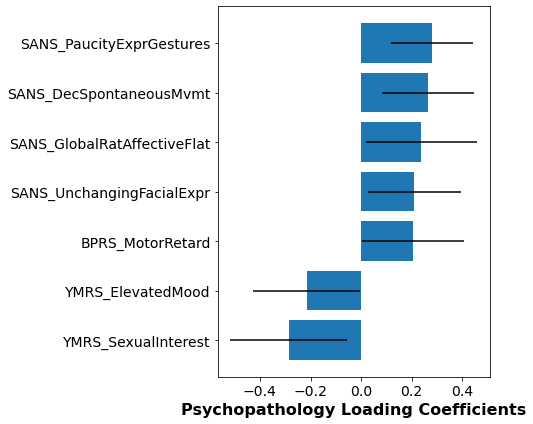

In [16]:
"""
loadings - psychopathology
"""

err = (pls_result["bootres"]["y_loadings_ci"][:, lv, 1]
      - pls_result["bootres"]["y_loadings_ci"][:, lv, 0]) / 2
relidx = (abs(pls_result["y_loadings"][:, lv]) - err) > 0  # CI doesnt cross 0
sorted_idx = np.argsort(-1 * pls_result["y_loadings"][relidx, lv])
plt.figure(figsize=(7,6))
plt.ion()
plt.barh(np.arange(sum(relidx)), np.sort(-1 * pls_result["y_loadings"][relidx, lv]), 
         xerr=err[relidx][sorted_idx], align='center')
plt.yticks(np.arange(sum(relidx)), labels=response_cleaned.columns[relidx][sorted_idx],
           rotation='horizontal', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Psychopathology Loading Coefficients", fontsize=16, fontweight="bold")
plt.tight_layout()
#plt.savefig("/u/project/cbearden/haleywan/qunex_studyfolder/analysis/scripts/PLS_ROI_Analysis/figures/bar_pls_lv1_pload.tiff")

In [20]:
## for visualization

## export the list of ROI loadings with significant contributions
ROIs = predictor_cleaned.columns[relidx][sorted_idx].tolist()
ROIs

['FA_Medial lemniscus L',
 'MD_Fornix (cres) / Stria terminalis R',
 'MD_Superior longitudinal fasciculus R',
 'MD_Medial lemniscus L',
 'RD_Genu of corpus callosum',
 'MD_Genu of corpus callosum',
 'RD_Medial lemniscus L']

In [21]:
coefs = xload["y_loadings"][relidx, lv].tolist()
coefs

[0.5003417758292243,
 -0.42129538912455755,
 -0.3821899462572988,
 -0.35985948116498395,
 -0.36690918512583176,
 -0.38455957341474745,
 -0.47792285064385626]

In [31]:
# put them together as a df
chart = pd.DataFrame({'ROIs': ROIs, 'Coefs': coefs})

# Make the coeeficients absolute values
chart['Coefs'] = chart['Coefs'].abs()
chart = chart.sort_values(by='Coefs', ascending=False)

# Remove the suffix of everything in front of the underscore
chart['ROIs'] = chart['ROIs'].str.split('_', expand=True).iloc[:, 1]
chart = chart.reset_index()

# Remove the repetative ROIs and keep the largest coefs
chart = chart.drop_duplicates(subset='ROIs', keep='first')
chart['ROIs'] = chart['ROIs'].str.replace(' ', '_')
chart

index                                ROIs     Coefs
0      0                  Medial_lemniscus_L  0.500342
2      1  Fornix_(cres)_/_Stria_terminalis_R  0.421295
3      5             Genu_of_corpus_callosum  0.384560
4      2  Superior_longitudinal_fasciculus_R  0.382190

In [32]:
chart.to_csv('MEND_loading_chart_for_vis.csv', index=False)